In [78]:
import pandas as pd

from sklearn.cluster import k_means, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

import plotly.figure_factory as ff
import plotly.offline as pltoff
import plotly as py

import numpy as np


In [79]:

# Import Data 
customer_df = pd.read_csv(r'../Clean_Data/Customer.csv')
sales_invoice_header_df = pd.read_csv(r'../Clean_Data/Sales Invoice Header.csv')
credit_invoice_header_df = pd.read_csv(r'../Clean_Data/Credit Invoice Header.csv')
value_entry = pd.read_csv(r'../../data/ValueEntry.csv')
item_ledger_entry = pd.read_csv(r'../../data/ItemLedgerEntry.csv')

C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.



In [80]:
# Mark Duplicated Data
customer_df['No_Dup'] = customer_df['No_'].duplicated()
customer_df['NameDup'] = customer_df['Name'].duplicated()

In [81]:
# Take Out duplicated keys
duplicate_No = customer_df[customer_df['No_Dup']]['No_'].astype(str).tolist()
customer_df_no_dup = customer_df[~customer_df['No_'].isin(duplicate_No)]


In [82]:
value_entry_summmarized = value_entry[['Item Ledger Entry No_', 'Sales Amount (Actual)']].groupby('Item Ledger Entry No_').sum()

item_ledger_entry_joined = item_ledger_entry.merge(value_entry_summmarized, 
                                                    left_on='Entry No_', 
                                                    right_on='Item Ledger Entry No_', 
                                                    how='left')

item_ledger_entry_summarized = item_ledger_entry_joined[['Source No_', 'Sales Amount (Actual)']].groupby('Source No_').sum()

customer_joined = customer_df.merge(item_ledger_entry_summarized, 
                                    left_on='No_', 
                                    right_on='Source No_',
                                     how='left')


<function matplotlib.pyplot.show(*args, **kw)>

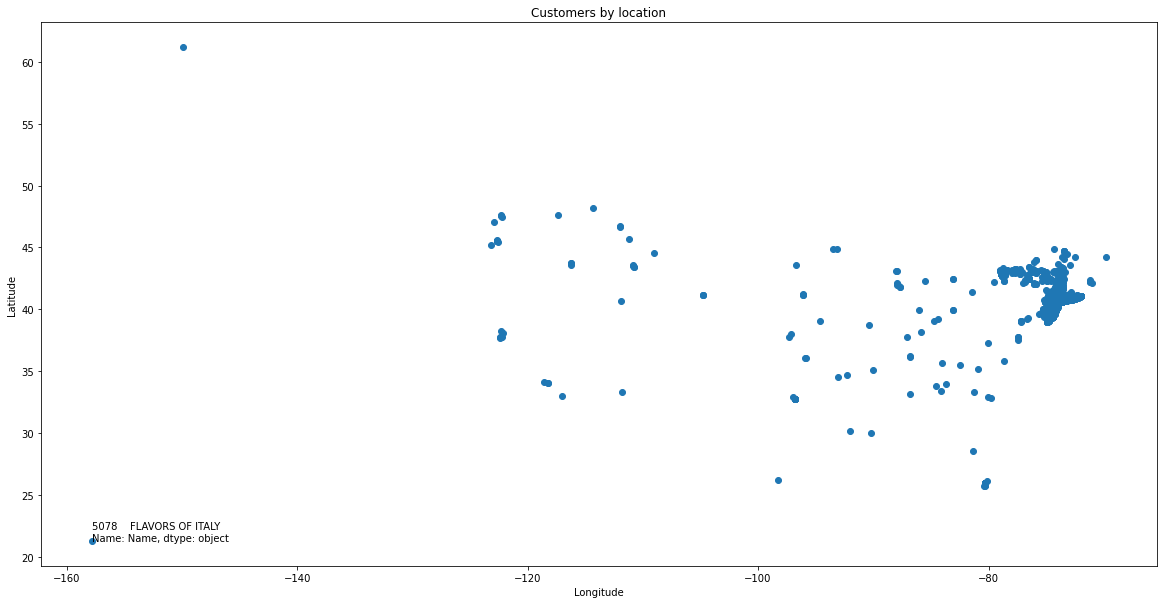

In [83]:
customer_no_NA = customer_joined[~customer_joined['Sales Amount (Actual)'].isna() & customer_joined['Sales Amount (Actual)'] > 0]
plt.figure(figsize=(20,10))
plt.scatter((customer_no_NA['longitude']), customer_no_NA['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Customers by location')
plt.text(customer_no_NA.longitude[customer_no_NA.longitude == min(customer_no_NA.longitude)],
         customer_no_NA.latitude[customer_no_NA.latitude == min(customer_no_NA.latitude)],
         str(customer_no_NA['Name'][(customer_no_NA.longitude == min(customer_no_NA.longitude)) & (customer_no_NA.latitude == min(customer_no_NA.latitude))]))
plt.show

In [84]:
## Dummy creation
customer_dendrogram = pd.get_dummies(customer_joined['On premise/off premise'])
customer_dendrogram = pd.concat([customer_joined, customer_dendrogram], axis=1)
customer_dendrogram = customer_dendrogram[['latitude', 'longitude', 'Sales Amount (Actual)', 
                                        'Distributors', 'Off premise', 'On premise', 'Others']]
## Ignore Customers without data
# customer_dendrogram = customer_dendrogram[~customer_dendrogram['Sales Amount (Actual)'].isna()]
customer_dendrogram = customer_dendrogram.dropna(how='any')
customer_dendrogram = customer_dendrogram[customer_dendrogram['Sales Amount (Actual)']>0]
customer_dendrogram['Sales Amount (Actual)'] = np.log(customer_dendrogram['Sales Amount (Actual)'])

## Min Max scaling

mms = MinMaxScaler()
mms.fit(customer_dendrogram.head(1000))
customer_dendrogram = mms.transform(customer_dendrogram)

fig = ff.create_dendrogram(customer_dendrogram)
fig.update_layout(width=2000, height=500)
fig.show()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
Z = linkage(customer_dendrogram.head(1000).to_numpy(), 'ward')
Y = linkage(X, 'ward')

print(Z)
print(Y)
print(Y[0,1])




[[ 325.          471.            0.            2.        ]
 [  86.          159.            0.            2.        ]
 [ 952.          979.            0.            2.        ]
 ...
 [1989.         1993.           29.60845059  524.        ]
 [ 563.         1996.           58.87091971  525.        ]
 [1995.         1997.           69.69856078 1000.        ]]
[[ 5.          6.          0.          2.        ]
 [ 2.          7.          0.          2.        ]
 [ 0.          4.          1.          2.        ]
 [ 1.          8.          1.15470054  3.        ]
 [ 9.         10.          2.12132034  4.        ]
 [ 3.         12.          4.11096096  5.        ]
 [11.         13.         14.07183949  8.        ]]
6.0


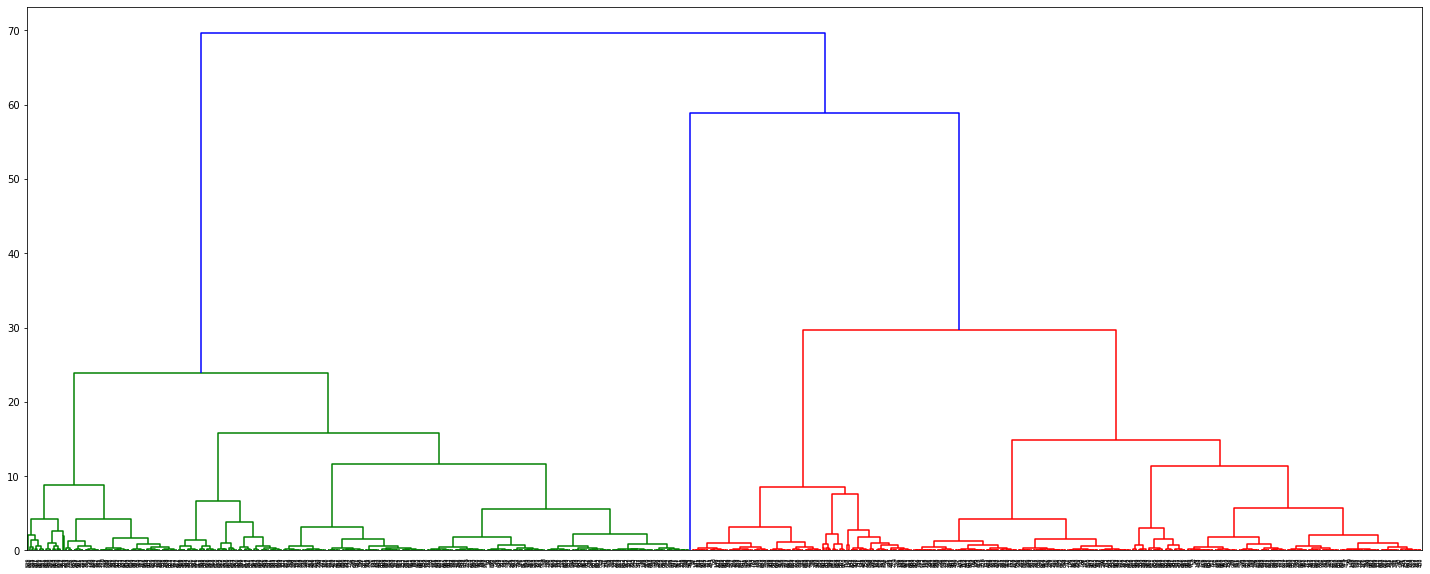

In [ ]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()  